# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 10 - Mini-Projeto - Agrupando Clientes Por Consumo de Energia</font>

### Especificação

A partir de dados de consumo de energia de clientes, nosso trabalho é agrupar os consumidores por similaridade a afim de compreender o comportamento dos clientes e sua relação com o consumo de energia.

Você deve executar as seguintes tarefas:
    
1- Tratar os valores ausentes nos dados.

2- Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-Means.

3- Encontrar o melhor valor de K para esse conjunto de dados.

4- Criar o modelo K-Means usando o valor de K encontrado no item 3.

5- Criar um Meshgrid para visualização de todos os clusters.

6- Visualizar os centróides.

7- Calcular o Silhoutte Score.

8 - Calcular a média de consumo de energia por cluster (usar a coluna Global_active_power para o cálculo da média).

Dica: Para o item 8, considere a amostra criada no item 2.

## Imports

In [1]:
import inspect
import os  # paths para os scripts
import sys

sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "data"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "features"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "models"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "visualization"))
import context as c  # shotscuts para os paths

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [3]:
# Carregando os dados
dataset = pd.read_csv(c.DATA_EXTERNAL_FLD/'household_power_consumption.txt', delimiter = ';', low_memory = False)

In [4]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
dataset = pd.DataFrame(data=dataset)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


## Pré Processamento

### Tratando valores Nulos

In [7]:
dataset.isnull().sum().sort_values(ascending=False)

Sub_metering_3           25979
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
dtype: int64

In [8]:
dataset.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
dataset = dataset.iloc[0:, 2:9].dropna()

### Separando 1% dos dados

In [11]:
other_data,ds = train_test_split(dataset,test_size=0.01, random_state=105)  

In [12]:
other_data.shape

(2028787, 7)

In [13]:
ds.shape

(20493, 7)

In [14]:
ds.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1256681,1.368,0.054,237.860,5.600,0.000,0.000,18.0
1526407,0.948,0.224,240.870,4.000,0.000,0.000,1.0
166769,1.372,0.128,240.190,5.600,0.000,1.000,17.0
903780,1.224,0.000,241.040,5.000,0.000,0.000,19.0
555591,0.446,0.130,239.080,2.000,0.000,1.000,0.0


### Transformando tipos de variaveis

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20493 entries, 1256681 to 571723
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    20493 non-null  object 
 1   Global_reactive_power  20493 non-null  object 
 2   Voltage                20493 non-null  object 
 3   Global_intensity       20493 non-null  object 
 4   Sub_metering_1         20493 non-null  object 
 5   Sub_metering_2         20493 non-null  object 
 6   Sub_metering_3         20493 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.3+ MB


In [16]:
ds.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [17]:
features_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

In [18]:
for col in features_to_convert:
    ds[col] = pd.to_numeric(ds[col], errors='coerce')
    
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20493 entries, 1256681 to 571723
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    20493 non-null  float64
 1   Global_reactive_power  20493 non-null  float64
 2   Voltage                20493 non-null  float64
 3   Global_intensity       20493 non-null  float64
 4   Sub_metering_1         20493 non-null  float64
 5   Sub_metering_2         20493 non-null  float64
 6   Sub_metering_3         20493 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


## K-Means

### Descobrindo o Melhor valor de K

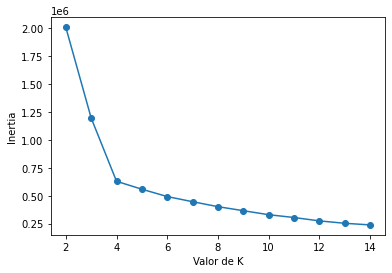

In [19]:
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.

# Lista de valores de K
Ks = range(2, 15)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Ks:
    modelo = KMeans(n_clusters = K, random_state = 101)
    modelo.fit(ds)
    valores_metrica.append(modelo.inertia_)

plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()

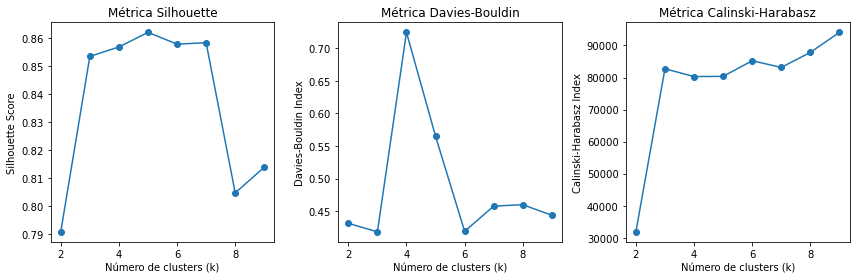

In [43]:
# Range de valores de k que serão testados
k_values = range(2, 10)
# Listas para armazenar os resultados das métricas
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Executa o algoritmo K-means para diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_

    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))

# Plot dos resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Métrica Silhouette')

plt.subplot(1, 3, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Métrica Davies-Bouldin')

plt.subplot(1, 3, 3)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Métrica Calinski-Harabasz')

plt.tight_layout()
plt.show()


### Criando o Modelo

In [23]:
# Aplica redução de dimensionalidade
X = PCA(n_components = 2).fit_transform(ds)

In [44]:
modelo = KMeans(n_clusters = 5,random_state = 101)
modelo.fit(X)

KMeans(n_clusters=5, random_state=101)

### MeshGrid

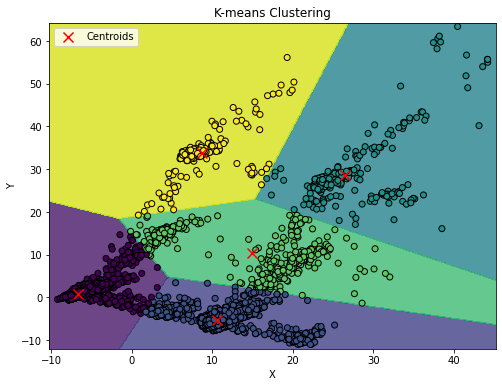

In [45]:
# Definir limites para o meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Criar meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prever rótulos para cada ponto do meshgrid
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

# Plotar resultado do meshgrid e clusters
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=modelo.labels_, edgecolor='k')
plt.scatter(modelo.cluster_centers_[:, 0], modelo.cluster_centers_[:, 1], 
            marker='x', color='r', s=100, label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.legend()
plt.show()

### Calcular o Silhouette Score


In [47]:
silhouette_avg = silhouette_score(X, modelo.labels_)
print("Silhouette Score:",silhouette_avg)

Silhouette Score: 0.8619518426359795


In [48]:
ds['cluster'] = modelo.labels_

In [50]:
ds.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
1256681,1.368,0.054,237.86,5.6,0.0,0.0,18.0,1
1526407,0.948,0.224,240.87,4.0,0.0,0.0,1.0,0
166769,1.372,0.128,240.19,5.6,0.0,1.0,17.0,1
903780,1.224,0.000,241.04,5.0,0.0,0.0,19.0,1
555591,0.446,0.130,239.08,2.0,0.0,1.0,0.0,0


In [51]:
ds.groupby('cluster')['Global_active_power'].mean()

cluster
0    0.519860
1    1.784869
2    4.662233
3    3.528573
4    3.338242
Name: Global_active_power, dtype: float64

### Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>